In [ ]:
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

In [1]:
# Importing necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
import csv
df = pd.read_csv('/content/IMDB Dataset.csv')


In [3]:
# Step 2: Encode sentiment labels to 0 and 1
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [4]:
# Step 3: Define X (reviews) and y (labels)
X = df['review'].values
y = df['sentiment'].values

In [5]:
# Step 4: Tokenization and padding
vocab_size = 10000
max_length = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post', truncating='post')

In [6]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Optimized Model (CNN + Dense)
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.7207 - loss: 0.5134 - val_accuracy: 0.8736 - val_loss: 0.2946
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.9235 - loss: 0.1993 - val_accuracy: 0.8843 - val_loss: 0.2805
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9752 - loss: 0.0860 - val_accuracy: 0.8833 - val_loss: 0.3336
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9959 - loss: 0.0220 - val_accuracy: 0.8814 - val_loss: 0.4126
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 0.8788 - val_loss: 0.4627
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 1.0000 - loss: 8.8377e-04 - val_accuracy: 0.8823 - val_loss: 0.5066
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 1.0000 - loss: 2.8171e-04 - val_accuracy: 0.8827 - val_loss: 0.5365
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 1.0000 - loss: 1

In [10]:
# Step 9: Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8831 - loss: 0.6012
Test Accuracy: 88.35%


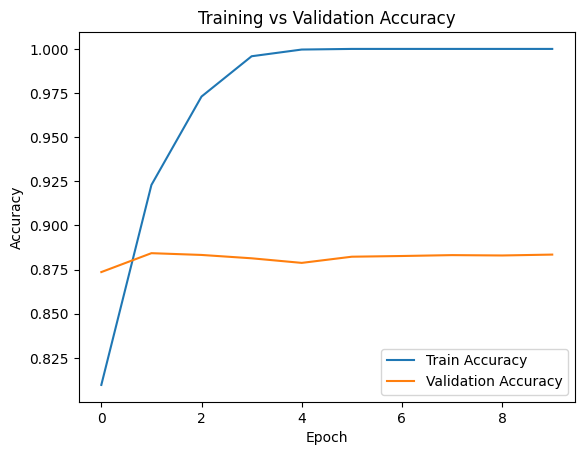

In [11]:
# Step 10: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [12]:
# Step 11: Predict sentiment from user review
def predict_review(review_text):
    sequence = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Predicted Sentiment: {sentiment}")

In [14]:
# Step 12: Take input and predict
user_review = input("Enter a movie review: ")
predict_review(user_review)

Enter a movie review: I did not like the movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Sentiment: Negative
